In [3]:
# LOGISTIC REGRESSSION
#Load data 

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from statsmodels.nonparametric.kde import KDEUnivariate
from sklearn import cross_validation, feature_selection,preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, auc
from patsy import dmatrices


df = pd.read_csv('titanic_data.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# COUNT TO SEE MISSINGS 

df.count(0)
# see if there are missings in each variable 

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [5]:
# Removing columns # Removing variables 
# Removing missings

df = df.drop(['Ticket','Cabin','Name'], axis=1)
# taking out overfitting variables like id which make no sense

# Remove missing values
df = df.dropna() 

df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.589888,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,258.683191,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,677.250000,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [6]:
# Split training and test


df_train = df.iloc[ 0: 600, : ]
df_test = df.iloc[ 600: , : ]

# THIS ASSUMES ORDER IS RANDOM  - otherwisw this will not be random 

## COULLD USE THIS INSTEAD

#df12X =  df12.copy() 
#df12X.columns = ['distance', 'order_size','store_m',
#              'avg_interactions','min_stay','avg_distance','parking_ticket','age','returned']

#train,test = cross_validation.train_test_split(df12X,train_size=0.80)

df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [7]:
# SM STATSMODEL logistic regression fit

formula = 'Survived ~ C(Pclass) + C(Sex) + Age + SibSp  + C(Embarked) +  Parch'
#C() indicates it is a cateogry in formal notation


# THIS SPLITS DF INTO A LABEL/VALUES (target/variables) two objects in a robust way (so 
# doesnt matter if you change the orders of the columns)

y_train,x_train = dmatrices(formula, data=df_train, return_type='dataframe')
y_test,x_test = dmatrices(formula, data=df_test, return_type='dataframe')

# instantiate our model
model = sm.Logit(y_train,x_train)
res = model.fit()
res.summary()

# MAKE SURE YOU DON'T PUT THE TARGET IN C(TARGET) IN THE FORMULA IT FREAKS OUT and gives 2 columns
# in your y_train, y_test 


# iterations if above 24 then indications that it had a hard time converging 

Optimization terminated successfully.
         Current function value: 0.450031
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  600
Model:                          Logit   Df Residuals:                      591
Method:                           MLE   Df Model:                            8
Date:                Tue, 20 Jun 2017   Pseudo R-squ.:                  0.3333
Time:                        12:03:45   Log-Likelihood:                -270.02
converged:                       True   LL-Null:                       -404.99
                                        LLR p-value:                 1.009e-53
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            4.3332      0.510      8.490      0.000       3.333       5.334
C(Pclass)[T.2]      -1.2030      0.325     -3.703      0.000      -1.840      -0.566
C(Pclass)[T.3]      -2.4673      0.320     -7.705      0.000      -3.095      -1.840
C(Sex)[T.male]      -2.6312      0.244    -10.797      0.000      -3.109      -2.154
C(Embarked)[T.Q]    -0.4359      0.647     -0.674      0.501      -1.704       0.832
C(Embarked)[T.S]    -0.2910      0.297     -0.980      0.327      -0.873       0.291
Age                 -0.0397      0.009     -4.464      0.000      -0.057      -0.022
SibSp               -0.3202      0.136     -2.354      0.019      -0.587      -0.054
Parch               -0.1420      0.136     -1.041      0.298      -0.409       0.125
====================================================================================
"""

In [8]:
# logistic fit with fomrula notation

formula = 'Survived ~ C(Pclass) + C(Sex) + Age + SibSp ' 

y_train,x_train = dmatrices(formula, data=df_train, return_type='dataframe')
y_test,x_test = dmatrices(formula, data=df_test, return_type='dataframe')

# instantiate our model
model = sm.Logit(y_train,x_train)
res = model.fit()
res.summary()


Optimization terminated successfully.
         Current function value: 0.451793
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  600
Model:                          Logit   Df Residuals:                      594
Method:                           MLE   Df Model:                            5
Date:                Tue, 20 Jun 2017   Pseudo R-squ.:                  0.3307
Time:                        12:04:10   Log-Likelihood:                -271.08
converged:                       True   LL-Null:                       -404.99
                                        LLR p-value:                 8.172e-56
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          4.1050      0.479      8.575      0.000       3.167       5.043
C(Pclass)[T.2]    -1.2971      0.306     -4.242      0.000      -1.896      -0.698
C(Pclass)[T.3]    -2.5739      0.305     -8.433      0.000      -3.172      -1.976
C(Sex)[T.male]    -2.5808      0.235    -10.996      0.000      -3.041      -2.121
Age               -0.0401      0.009     -4.549      0.000      -0.057      -0.023
SibSp             -0.3691      0.130     -2.840      0.005      -0.624      -0.114
==================================================================================
"""

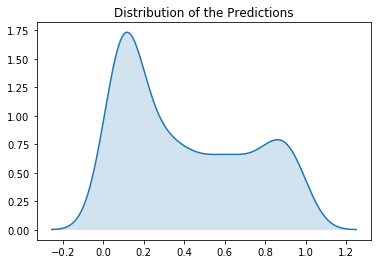

In [9]:
# logistic regression see probability distribution

import warnings
warnings.filterwarnings('ignore')

kde_res = KDEUnivariate(res.predict())
kde_res.fit()
plt.plot(kde_res.support,kde_res.density)
plt.fill_between(kde_res.support,kde_res.density, alpha=0.2)
plt.title("Distribution of the Predictions")
plt.show()

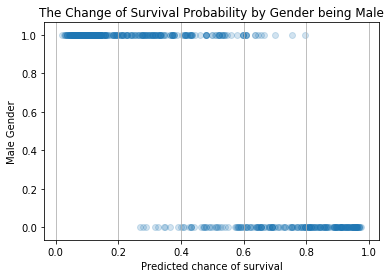

In [10]:
# plot logistic regression based on single variable

plt.scatter(res.predict(),x_train['C(Sex)[T.male]'] , alpha=0.2)
plt.grid(b=True, which='major', axis='x')
plt.xlabel("Predicted chance of survival")
plt.ylabel("Male Gender")
plt.title("The Change of Survival Probability by Gender being Male")

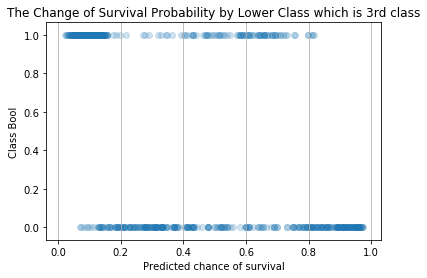

In [11]:
# plot logistic regression based on different variable categorical

plt.scatter(res.predict(),x_train['C(Pclass)[T.3]'] , alpha=0.2)
plt.xlabel("Predicted chance of survival")
plt.ylabel("Class Bool")
plt.grid(b=True, which='major', axis='x')
plt.title("The Change of Survival Probability by Lower Class which is 3rd class")

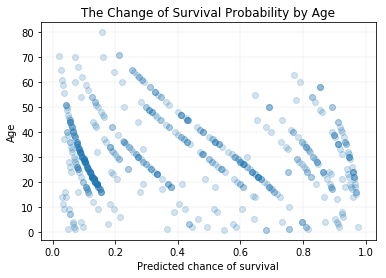

In [12]:
# plot logistic regression based on numeric variable 

plt.scatter(res.predict(),x_train.Age , alpha=0.2)
plt.grid(True, linewidth=0.15)
plt.title("The Change of Survival Probability by Age")
plt.xlabel("Predicted chance of survival")
plt.ylabel("Age")

# we can see that younger ages more likely to survived
# older more likely to die = skewed towards 0

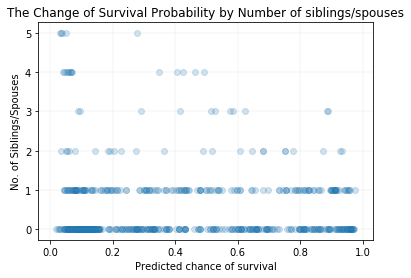

In [13]:
# plot logistic regression based on multiple categorica variable

plt.scatter(res.predict(),x_train.SibSp , alpha=0.2)
plt.grid(True, linewidth=0.15)
plt.title("The Change of Survival Probability by Number of siblings/spouses")
plt.xlabel("Predicted chance of survival")
plt.ylabel("No. of Siblings/Spouses")

In [14]:
# confusion matrix TP FP 
# accuract precision scores of logistic regression 

y_pred = res.predict(x_test)
y_pred_flag = y_pred > 0.7
print (pd.crosstab(y_test.Survived
                  ,y_pred_flag
                  ,rownames = ['Actual']
                  ,colnames = ['Predicted']))

print ('\n \n')

print (classification_report(y_test,y_pred_flag))

TP = pd.crosstab(y_test.Survived,y_pred_flag)[1][1]
TN = pd.crosstab(y_test.Survived,y_pred_flag)[0][0]
FP = pd.crosstab(y_test.Survived,y_pred_flag)[0][1]
FN = pd.crosstab(y_test.Survived,y_pred_flag)[1][0]

ACC = (TP+TN)/(TP+TN+FP+FN)

ACC

Predicted  False  True 
Actual                 
0.0           67      0
1.0           21     24

 

             precision    recall  f1-score   support

        0.0       0.76      1.00      0.86        67
        1.0       1.00      0.53      0.70        45

avg / total       0.86      0.81      0.80       112



0.8125

In [15]:
# Logistic regression ROC

# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print ("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.879934


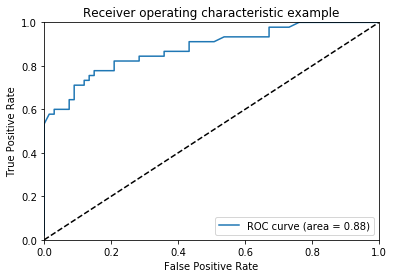

In [16]:
# Logistic regression ROC curve graph

# Plot ROC curve
plt.clf()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [17]:
## LOGISTIC REGRESSION WITH SCIKITLEARN SKL 
# STEP LRSKL1: FIT

# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(x_train, y_train.Survived)

In [18]:
# examine the coefficients
pd.DataFrame(list(zip(x_train.columns, np.transpose(model.coef_))))

,0,1
0,Intercept,[1.6790105519]
1,C(Pclass)[T.2],[-0.941153850152]
2,C(Pclass)[T.3],[-2.13935206533]
3,C(Sex)[T.male],[-2.34378495978]
4,Age,[-0.0314323508583]
5,SibSp,[-0.29768875288]


In [19]:
# STEP LRSK2: PREDICT 
# STEP LRSK3: SCORE 

y_pred = model.predict_proba(x_test)
y_pred_flag = y_pred[:,1] > 0.7


print (pd.crosstab(y_test.Survived
                  ,y_pred_flag
                  ,rownames = ['Actual']
                  ,colnames = ['Predicted']))

print ('\n \n')

print (classification_report(y_test,y_pred_flag))

Predicted  False  True 
Actual                 
0.0           67      0
1.0           23     22

 

             precision    recall  f1-score   support

        0.0       0.74      1.00      0.85        67
        1.0       1.00      0.49      0.66        45

avg / total       0.85      0.79      0.77       112



In [20]:
# LRSK ROC 

# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred[:,1])
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.878275


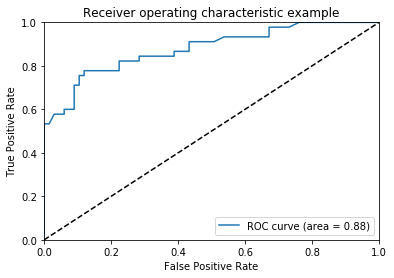

In [21]:
# LRSK Plot ROC curve
plt.clf()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# We must also take care to check the assumptions applied to logistic regression models: http://machinelearningmastery.com/logistic-regression-for-machine-learning/